In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as ticker

In [2]:
import os
import sys  
sys.path.insert(0, '/data/user/ibrewer/kansas_data')

In [3]:
## Import module to read chamber files
import ReadChamberFiles
from ReadChamberFiles import ReadFile, ReadBlock

In [4]:
## Include path to data
day2_path = '/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day2/Antenna1/'
day3_path = '/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day3/Antenna1/'

In [5]:
## Function for plotting colors

def qualitative_colors(n):
    if n < 1:
        raise ValueError("Minimum number of qualitative colors is 1.")
    elif n > 12:
        raise ValueError("Maximum number of qualitative colors is 12.")
    cols = ["#4477AA", "#332288", "#6699CC", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#661100", "#CC6677", "#AA4466", "#882255", "#AA4499"]
    indices = [
        [0],
        [0, 9],
        [0, 7, 9],
        [0, 5, 7, 9],
        [1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9, 12],
        [1, 3, 4, 5, 7, 9, 12],
        [1, 3, 4, 5, 6, 7, 9, 12],
        [1, 3, 4, 5, 6, 7, 9, 11, 12],
        [1, 3, 4, 5, 6, 7, 8, 9, 11, 12],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ]
    return [cols[ix] for ix in indices[n - 1]]

In [12]:
## Identify which files you want to plot

file_name_top = 'Meas50_TxVert_TopLNA_44.9deg_Continuous_3MinRun.txt'
file_name_bot = 'Meas66_TxVert_BotLNA_45.1deg_Continuous_3MinRun.txt'

In [13]:
## Extract data from files of interest

bot_freqs, bot_data = ReadFile(day3_path+file_name_bot)
top_freqs, top_data = ReadFile(day3_path+file_name_top)

Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.7,0.0196561

At the last count 901.0
Horizontal Imaginary

		360.7,-0.016944

At the last count 901.0
Horizontal Log Magnitude

		360.7,-31.7169

At the last count 901.0
Horizontal Phase

		360.7,-40.762

At the last count 901.0
Horizontal Linearized Phase

		360.7,-46840.8

At the last count 901.0
Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.7,0.0226925

At the last count 901.0
Horizontal Imaginary

		360.7,-0.00439738

At the last count 901.0
Horizontal Log Magnitude

		360.7,-32.7223

At the last count 901.0
Horizontal Phase

		360.7,-10.9669

At the last count 901.0
Horizontal Linearized Phase

		360.7,-47891

At the last count 901.0


In [14]:
## Pull out the specific data of interest, "Horizontal Log Magnitude"

gain_arr_bot = bot_data["Horizontal Log Magnitude"]
gain_arr_top = top_data["Horizontal Log Magnitude"]

In [15]:
## Plot the beam pattern from chamber data

def gain_plots(az, meas, freqs, g_array, freqs_array, lna):
    ## az: string, azimuth angle
    ## meas: string, measurement number
    ## freqs: list, list of frequencies you want to plot in MHz, ex. [100, 200, 300]
    ## g_array: array, beam pattern extracted from ReadFile module
    ## freqs_array: array, frequency array extracted from ReadFile module
    ## lna: string, type of LNA used (top or bottom)
    
    # Set formatting for the plot
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(0)
    ax.set_thetamax(360)
    ax.set_theta_direction(1)
    ax.set_theta_offset(-np.pi/2.0)
    colors = qualitative_colors(len(freqs))
    i = 0
    
    # Plot the beam pattern for each freqency
    for freq in freqs:
        freq_value = np.where(freqs_array==freq)[0][0]
        g_zen = g_array[1][freq_value]
        g = 10**((g_zen + 10)/20)
        #g_max  = np.max(g_zen)
        zen = g_array[0]*(np.pi/180)
        ax.plot(zen, 10*np.log10(g), color=colors[i], label='%d MHz' %(freq))
        i += 1
        
    ax.tick_params(axis='both', labelsize='large')
    ax.set_title('Measurement '+meas+', '+lna+' LNA, \u03C6 = %0.1f' %(az), fontsize=25, pad=25)
    #pad=-25
    #ax.set_rticks(np.arange(0,7,1))
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='center right')
    plt.show()
    
    return

In [16]:
## Function to pull out the gain at 180 degrees zenith and plot this gain at each frequency

def freqs_v_gain(g_array, freqs_array):
    ## g_array: array, beam pattern extracted from ReadFile module
    ## freqs_array: array, frequencies extracted from ReadFile module
    
    freqs = np.linspace(50.0,500.0,901)
    gain_at_180 = np.zeros(len(freqs))

    i = 0
    for freq in freqs:
        freq_value = np.where(freqs_array==freq)[0][0]
        g_zen = g_array[1][freq_value]
        #print(g_zen)
        #g_max  = np.max(g_zen)
        zen = g_array[0]
        if '180' in zen:
            zen_search = 180
        else:
            test = -1
            search_val = 179.5
            while test < 0:
                if search_val in zen:
                    test = 1
                else:
                    search_val += 0.1
                    search_val = np.round(search_val, decimals=1)

            zen_search = search_val
                           
        index_180 = np.where(zen==search_val)[0][0]

        gain_at_180[i] = g_zen[index_180]
        i += 1

    return gain_at_180

/tmp/ipykernel_11384/2447531148.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '180' in zen:


Text(0.5, 1.0, 'Day 3, Antenna 1')

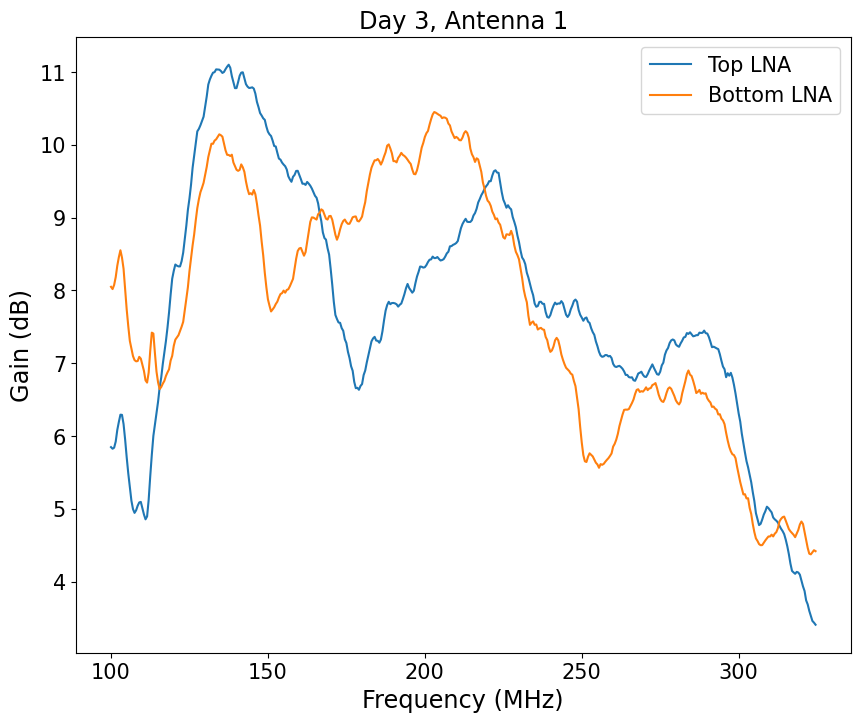

In [17]:
plt.figure(figsize=(10,8))

top_180 = freqs_v_gain(gain_arr_top, top_freqs)
bot_180 = freqs_v_gain(gain_arr_bot, bot_freqs)

plt.plot(top_freqs[100:550], top_180[100:550], label='Top LNA')
plt.plot(bot_freqs[100:550], bot_180[100:550], label='Bottom LNA')

plt.xlabel('Frequency (MHz)', fontsize='xx-large')
plt.ylabel('Gain (dB)', fontsize='xx-large')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('Day 3, Antenna 1', fontsize='xx-large')

In [18]:
# Total gain calculations
# Looking at the same antenna, same LNA, same azimuth, different polarizations
# Day 3, Antenna 1: Meas37_TxVert_BotLNA_45.1deg_Continuous_3MinRun.txt
# Day 2, Antenna 1: Meas07_TxHorizon_BotLNA_45.2deg_Continuous_3MinRun.txt

In [19]:
# Identify data to plot:
horiz_freqs, horiz_data = ReadFile(day2_path+'Meas07_TxHorizon_BotLNA_45.2deg_Continuous_3MinRun.txt')
vert_freqs, vert_data = ReadFile(day3_path+'Meas37_TxVert_BotLNA_45.1deg_Continuous_3MinRun.txt')
horiz_gain = horiz_data["Horizontal Log Magnitude"]
vert_gain = vert_data["Horizontal Log Magnitude"]

Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.1,0.000407597

At the last count 901.0
Horizontal Imaginary

		360.1,0.015017

At the last count 901.0
Horizontal Log Magnitude

		360.1,-36.4651

At the last count 901.0
Horizontal Phase

		360.1,88.4452

At the last count 901.0
Horizontal Linearized Phase

		360.1,-47431.6

At the last count 901.0
Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.7,0.0107744

At the last count 901.0
Horizontal Imaginary

		360.7,-0.0201932

At the last count 901.0
Horizontal Log Magnitude

		360.7,-32.8079

At the last count 901.0
Horizontal Phase

		360.7,-61.9172

At the last count 901.0
Horizontal Linearized Phase

		360.7,-46501.9

At the last count 901.0


In [26]:
## Use Friss equation to convert beam pattern to gain

def friis(freq, beam_pattern, s21):
    d = 6.5
    wavelength = (3*(10**8))  / (freq*(10**6))
    print("wavelength is %f" %wavelength)
    extra = 20*np.log10((4 * np.pi * d)/wavelength)
    print("extra is %f" %extra)
    return beam_pattern - s21 - 20*np.log10((4 * np.pi * d)/wavelength)

In [21]:
def power_watts(dB):
    return 10**(dB/10)

In [22]:
## Find S parameters

import skrf as rf

def s_param(file_name):
    
    file = rf.Network(file_name) # Change directory
    # File must be a .s2p file
    size = file.s.shape[0]
    freqs = file.f # Extract the frequencies
    
    s11 = np.zeros(size)
    s12 = np.zeros(size)
    s21 = np.zeros(size)
    s22 = np.zeros(size)

    # Extract S parameters
    for i in range(size):
        matrix = abs(file.s[i])
        s11[i] = 20*np.log10(matrix[0][0])
        s12[i] = 20*np.log10(matrix[0][1])
        s21[i] = 20*np.log10(matrix[1][0])
        s22[i] = 20*np.log10(matrix[1][1])
    
    return s11, s12, s21, s22, freqs

In [23]:
s11, s12, s21, s22, freq_LNA = s_param('/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day1/Antenna1/TxHroiz_45azi_180zen.s2p')

In [24]:
## Use two beam patterns w different Tx polarizations

def total_gain(az, meas, freqs, g_horiz, g_vert, freqs_horiz, freqs_vert, lna):
    # az = azimuth angle, float
    # meas = measurement number, string
    # freqs = desired frequencies to plot, list, ex. [50,100,200]
    # g_horiz = gain w horizontal polarization, array (found with ReadFile)
    # g_vert = gain w vertical polarization, array (found with ReadFile)
    # freqs_horiz = possible frequencies in the horizontal direction, array (found with ReadFile)
    # freqs_vert = possible frequencies in the vertical direction, array (found with ReadFile)
    # lna = LNA type, string (specify top or bottom LNA)
    
    # First address some formatting:
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(0)
    ax.set_thetamax(360)
    ax.set_theta_direction(1)
    ax.set_theta_offset(-np.pi/2.0)
    colors = qualitative_colors(len(freqs))
    
    # Then plot data: 
    i = 0
    for freq in freqs:
        # Horizontal
        freq_value_horiz = np.where(freqs_horiz==freq)[0][0]
        g_zen_horiz = g_horiz[1][freq_value_horiz]
        #g_max  = np.max(g_zen)
        zen_horiz = g_horiz[0]*(np.pi/180)
        # Vertical 
        freq_value_vert = np.where(freqs_vert==freq)[0][0]
        g_zen_vert = g_vert[1][freq_value_vert]
        zen_vert = g_vert[0]*(np.pi/180)
        g_sum = 10**((g_zen_horiz[:629] + g_zen_vert[:629] + 10)/20)
        g_total = friis(freq, 20*np.log(g_sum), s21[np.where(freq_LNA==(freq*10**6))[0][0]])
        ax.plot(zen_horiz[:629], g_total, color='purple', label='%d MHz, Both' %(freq))
        i += 1
        
    ax.tick_params(axis='both', labelsize='large')
    ax.set_title('Measurements '+meas+', '+lna+' LNA, \u03C6 = %0.1f' %(az), fontsize=20, pad=25)
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='center right')
    plt.show()
    
    return

wavelength is 1.500000
extra is 34.720639


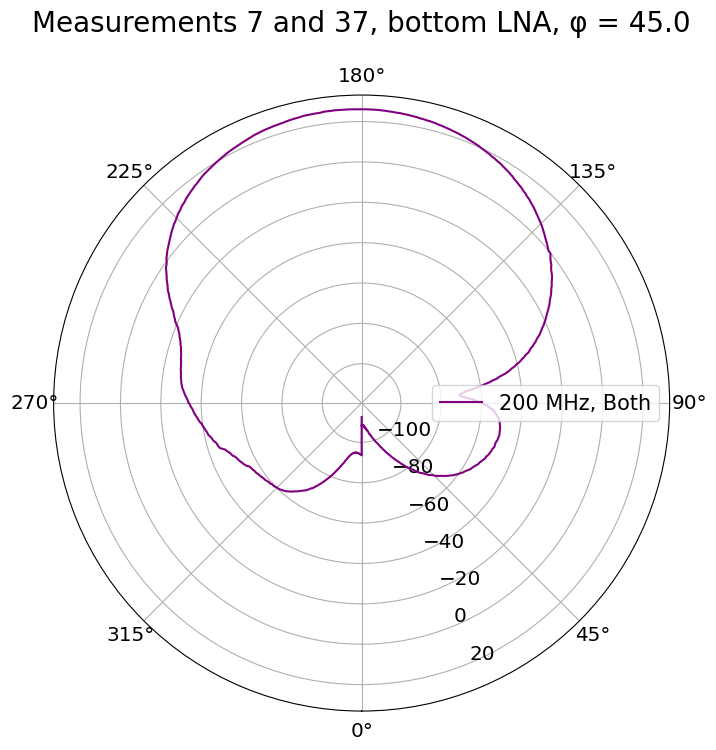

In [27]:
total_gain(45, '7 and 37', [200], horiz_gain, vert_gain, horiz_freqs, vert_freqs, 'bottom')

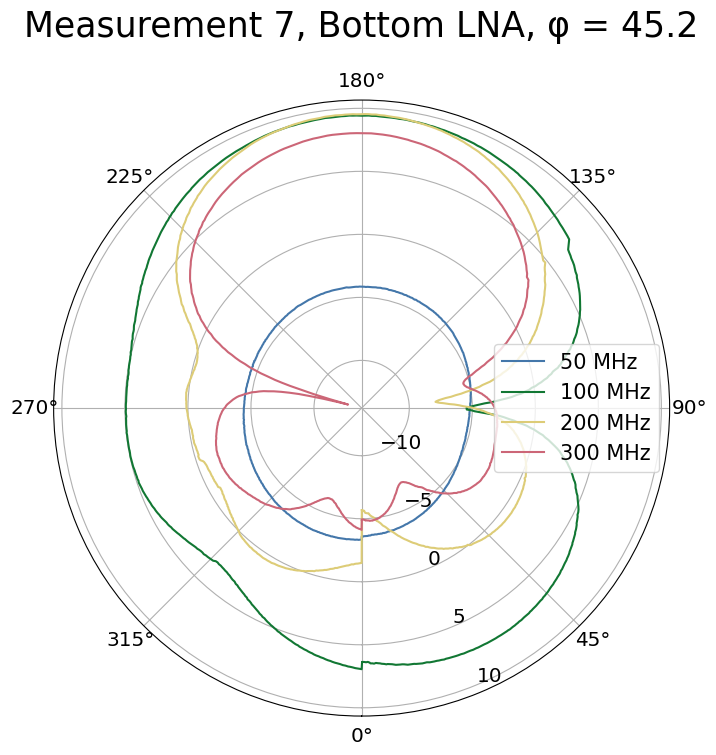

In [28]:
gain_plots(45.2, '7', [50,100,200,300], horiz_gain, horiz_freqs, 'Bottom')

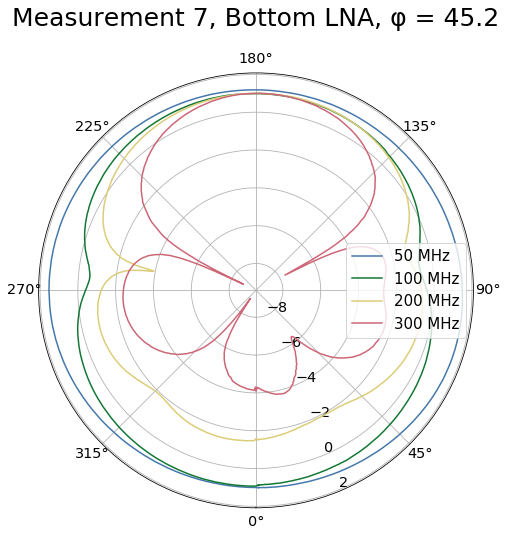

In [25]:
gain_plots(45.2, '7', [50,100,200,300], gain_arr, test_freqs, 'Bottom')

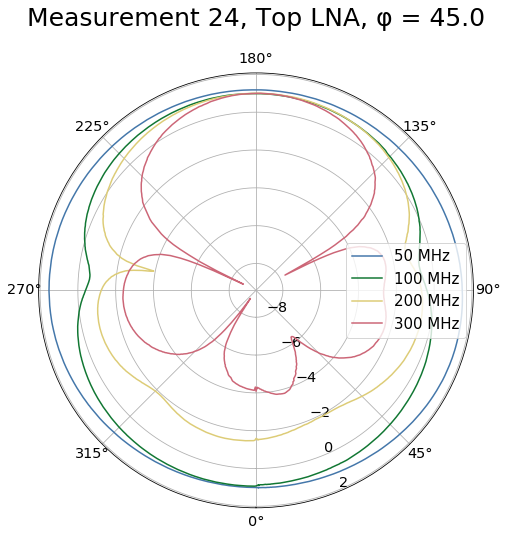